In [1]:
# 🧑🏻‍💻 В компании SkyCrossroads запущена рекламная акция:

# Клиент может получить дополнительные баллы лояльности за покупку, совершенную в течение ограниченного периода.

# Классическая акция подразумевает получение дополнительных 1000 баллов лояльности за покупку от 100 рублей. 

# Было решено запустить АБ Тест, в котором в тестовой группе предлагается в два раза больше баллов лояльности за покупку 
# от 100 рублей. 

# Эксперимент был проведен в нескольких торговых точках, которые в датасете представлены столбцом id_point. Также в 
# датасете есть информация о том, как долго клиент зарегистрирован у нас в программе лояльности.

# Вам поступил запрос от отдела маркетинга:

# - Рассчитать результаты эксперимента в целом и в отдельности по каждой торговой точке
# - Вынести решение об эффективности воздействия Б по сравнению с воздействием А
# - Сделать сегментацию пользователей с точки зрения длительности регистрации в программе лояльности

# - **Расшифровка данных**
    
#     **id_client** - уникальный id клиента
    
#     **id_group** - контроль (1000 баллов лояльности) / тест (2000 баллов лояльности)
    
#     **sum_pay** - сумма, на которую была совершена покупка
    
#     **id_point** - id торговой точки
    
#     **months_reg** - длительность регистрации клиента в программе лояльности


In [2]:
# # Часть 1. Создание статистических функций

# ### Задача 1

# Постройте в Python функцию **statistical_analysis**, которая будет проводить анализ выборки. 

# **На вход она берет:**

# - один ряд ***r*** в формате «список» (*list*) или «кортеж» (*tuple*). Это ряд, который необходимо исследовать.
# - один ряд ***q*** в формате «список» (*list*). Это ряд квантильных порогов, для которых необходимо вычислить 
# квантильные значения ряда ***r***. Аргумент ***q*** должен иметь значение по умолчанию 
# *q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]* (но при желании значение ряда ***q*** можно было бы заменить)

# <aside>
# 🔎 Для выполнения этого задания вам нужно самостоятельно разобраться с функцией quantile из библиотеки numpy.

# </aside>

# **И делает следующие шаги:**

# 1. Проводит проверку на тип данных ряда : если тип данных ряда ***r*** не «список» (*list*) или «кортеж» (*tuple*), 
# то выводит ошибку «Нужен список или кортеж!»  
# 2. Проводит проверку на длину ряда ***r***: если в нём 4 наблюдения или меньше, то выдает ошибку «Требуется более длинный ряд».
# 3. Проводит преобразование типа данных «список» (*list*) или «кортеж» (*tuple*) в тип данных Series (*pandas*).
# 4. Для ряда выводит (с помощью *print* и расшифровки) среднее (метод Series “*mean*”), дисперсию (метод Series “*var*”), 
# стандартное отклонение (метод Series “*std*”).
    
#     Также записывает эти значения во внутренние переменные и возвращает эти переменные в *return*.
    
# 5. С помощью функции *quantile* из библиотеки *numpy* функция рассчитывает и записывает в отдельную переменную ***qs*** 
# список из квантилей, соответствующих квантильным порогам из ***q***. 
    
#     Можно прочитать документацию функции *quantile:* [https://numpy.org/doc/stable/reference/generated/numpy.quantile.html]
# (https://numpy.org/doc/stable/reference/generated/numpy.quantile.html)
    
#     Ряд ***qs*** также должен быть в return функции (вместе со средним, дисперсией и стандартным отклонением из пункта-4).
    
# 6. Оформляет принт результатов квантильного анализа. Для этого необходимо проверить, есть ли среди указанных в аргументе 
# квантильных порогов те, что соответствуют ***медиане***, ***квартилям*** или ***децилям***. 
# Если такие квантильные пороги есть, то для каждого из них оформите print с указанием квантильного порога и его значения.
# 7. Для ряда функция **statistical_analysis** строит гистограмму с помощью библиотеки *seaborn*.


In [3]:
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

In [44]:
df = pd.read_csv('Dataset_AB_TEST.csv', sep = ';')
df
# id_client - уникальные значения в df

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [45]:
def statistical_analysis(r, q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]):
    
    if (type(r) is not list) & (type(r) is not tuple):
        print("Нужен список или кортеж")
        return
    
    if len(r)<=4:
        print("Need a longer row!")
        return

    r = pd.Series(r)
    
    m = r.mean()
    v = r.var()
    s = r.std()
    
    print("Среднее ряда = ", m)
    print("Дисперсия ряда = ", v)
    print("Стандартное отклонение ряда = ", s)
    print()
    
    qs = np.quantile(r,q)
    
    for i in range(len(q)):
        if q[i]==0.5:
            print("Mediane = ",qs[i])
        elif q[i]==0.25:
            print("First quartile = ",qs[i])
        elif q[i]==0.75:
            print("Third quartile = ",qs[i])
        elif q[i]*100 % 10==0:
            print("Decile number",q[i]*10," = ",qs[i])
        else:
            print("Quantile ",q[i]," = ",qs[i])
                
    sns.histplot(data = r)
    
    return m, v, s, qs


In [46]:
### Задача 2

# Постройте в Python функцию ***test_calc***, которая будет проводить t-тест на равенство средних двух выборок. 

# **На вход она берет:**

# - Ряд 1 (***r1***)
# - Ряд 2 (***r2***)
# - Уровень значимости ***alpha*** (имеет дефолтное значение = 5%)

# **И делает следующие шаги:**

# 1. Вычисляет значение *t-критерия* и его *p_value* по сравнению средних значений рядов ***r1*** и ***r2.*** 
# Лучше всего воспользоваться функцией *ttest_ind* из библиотеки *scipy.stats.* Эти значения сохраняются во внутренние 
# переменные (значение t-критерия в переменную ***s,*** p_value в переменную ***p***).
# 2. Возвращает (*return*) переменные ***s*** и ***p***.
# 3. Оформляет принт результатов, принимается ли нулевая гипотеза о равенстве средних или нет на основании сравнения 
# полученного *p_value* (переменная ***р***) и аргумента ***alpha.***


In [47]:
def test_calc(r1, r2, alpha=0.05):
    s, p = st.ttest_ind(r1, r2)
    print("Среднее значение 1 ряда", r1.mean())
    print("Среднее значение 2 ряда", r2.mean())
    print("Разница средних = ", r1.mean()-r2.mean())
    if p > alpha:
        print(f'Нулевая гипотеза о равенстве средних принимается, т.к. p_value = {p}, что больше чем {alpha}. '\
              f'Значение стат критерия {s}')
    else:
        print(f'Нулевая гипотеза о равенстве средних отвергается, т.к. p_value = {p}, что меньше чем {alpha}. '\
              f'Значение стат критерия {s}')
    return s, p


In [48]:
### Задача 3

# Постройте в Python функцию **mann_whitney_func**, которая будет проводить тест Манна-Уитни для двух выборок.

# **На вход она берет:**

# - Ряд 1 (***r1***)
# - Ряд 2 (***r2***)
# - Уровень значимости ***alpha*** (имеет дефолтное значение = 5%)

# **И делает следующие шаги:**

# 1. Вычисляет значение статистики Манна — Уитни и p_value нулевой гипотезы теста Манна-Уитни. Значение статистики 
# записывается во внутреннюю переменную ***s***, а *p_value* - во внутреннюю переменную ***p***.
# 2. Принт результата в зависимости от соотношения p_value и alpha («Распределения (не) равны»).
# 3. Возвращает (в *return*) — внутренние переменные ***s*** и ***p***.


In [49]:
def mann_whitney_func(r1, r2, alpha=0.05):
    s, p = st.mannwhitneyu(r1, r2)
    if p > alpha:
        print(f'Распределения равны, т.к. p_value = {p}, что больше чем {alpha}. '\
              f'Значение стат критерия {s}')
    else:
        print(f'Распределения не равны, т.к. p_value = {p}, что меньше чем {alpha}. '\
              f'Значение стат критерия {s}')
    return s, p


In [50]:
def bootstrap_ab_func(r1, r2):
    r1 = r1.values
    r2 = r2.values
    boot_results = bs.bootstrap_ab(ctrl = r1, test = r2
                                  , stat_func = bs_stats.mean
                                  , compare_func = bs_compare.difference
                                  , return_distribution=True)
    borders = np.percentile(boot_results, [2.5, 97.5])
    dist = sns.distplot(boot_results) # функция построения распределения
    plt.title('Bootstrap-распределение')
    plt.rcParams["figure.figsize"] = (12, 6)
    plt.vlines(0, # отрисуем линию на уровне ноля
               ymin = 0, 
               ymax = dist.get_ylim()[1], 
               linestyles= '--', 
               colors = 'red')
    plt.vlines(borders, # отрисуем перцентили
               ymin = 0, 
               ymax = dist.get_ylim()[1], 
               linestyles= '--', 
               colors = 'grey', 
               label = '95%-доверительный интервал')
    plt.legend()
    plt.show()
    if borders[0] > 0:
        print(f'По результатам бутстрапа видно, что отметка 0 не входит в доверительный интервал, и т.к. '\
              'распределение находится правее 0 - тестовая группа показала лучший результат, чем контрольная.')
    elif (borders[0] < 0) & (borders[1] > 0):
        print(f'По результатам бутстрапа видно, что отметка 0 входит в доверительный интервал, -'\
              ' тестовая группа не отличается от контрольной.')
    else:
        print(f'По результатам бутстрапа видно, что отметка 0 не входит в доверительный интервал, и т.к. '\
              'распределение находится левее 0 - тестовая группа показала худший результат, чем контрольная.')

In [51]:
# **Проведите общий анализ A/B Теста**

# 1. С помощью функции *read-csv* импортните csv файл с датасетом.
# 2. Исследуйте данные. Проведите очистку данных от нуллов и выбросов (для очистки от выбросов  используйте созданную 
#                                                                      в первом шаге функцию ***statistical_analysis***).
# 3. Создайте функцию для визуализации ***show_hist***, которая имеет следующие аргументы:
#     - ***r1*** (первый ряд для визуализации)
#     - ***r2*** (второй ряд для визуализации)
#     - ***graph_title*** (Строка-название графика)
#     - ***xlabel*** (подпись оси Х с дефолтным значением “*Размер платежа*”)
#     - ***ylabel*** (подпись оси Y с дефолтным значением “*Кол-во людей*”)
    
#     Функция должна с помощью библиотеки ***seaborn*** строить гистограмму для каждого из рядов (вместе на одном графике) 
#     и подписывать график (***graph_titile)*** и оси ***(xlabel, ylabel)***.
    
# 4. Проведите визуализацию с помощью функции ***show_hist*** для сравнения результатов в А и В группе.
# 5. Посмотрите на результаты параметрического и непараметрического теста (используйте созданные в первой 
#                                                                 шаге функции ***mann_whitney_func*** и ***test_calc***).
# 6. Сделайте выводы.

In [53]:
df = df.dropna()
df.info()
df.describe()
statistical_analysis(list(df['sum_pay'])) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10840 non-null  int64  
 1   id_group    10840 non-null  object 
 2   sum_pay     10840 non-null  float64
 3   id_point    10840 non-null  float64
 4   months_reg  10840 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 508.1+ KB


,id_client,sum_pay,id_point,months_reg
count,1.084000e+04,10840.000000,10840.000000,10840.000000
mean,1.372953e+06,3568.758026,1180.039760,4.693911
std,1.482036e+04,2927.273978,4.353995,3.174513
min,1.359000e+06,59.000000,1178.000000,0.000000
25%,1.361710e+06,1250.750000,1178.000000,2.000000
50%,1.370636e+06,3173.500000,1179.000000,4.000000
75%,1.373417e+06,5356.500000,1179.000000,6.000000
max,1.420345e+06,24797.000000,1199.000000,14.000000


Среднее ряда =  3422.1146473106273
Дисперсия ряда =  5970737.65014
Стандартное отклонение ряда =  2443.509289963924

Decile number 1.0  =  407.5
First quartile =  1234.25
Decile number 3.0  =  1573.5
Decile number 4.0  =  2299.0
Mediane =  3151.5
Decile number 6.0  =  3891.0
Third quartile =  5260.75
Decile number 9.0  =  6989.5
Среднее ряда =  4.68248650660711
Дисперсия ряда =  10.031516422572558
Стандартное отклонение ряда =  3.1672569239915727

Decile number 1.0  =  1.0
First quartile =  2.0
Decile number 3.0  =  3.0
Decile number 4.0  =  3.0
Mediane =  4.0
Decile number 6.0  =  5.0
Third quartile =  6.0
Decile number 9.0  =  9.0


,id_client,sum_pay,id_point,months_reg
count,1.074600e+04,10746.000000,10746.000000,10746.000000
mean,1.372852e+06,3422.114647,1180.030523,4.682487
std,1.482040e+04,2443.509290,4.369359,3.167257
min,1.359000e+06,59.000000,1178.000000,0.000000
25%,1.361687e+06,1234.250000,1178.000000,2.000000
50%,1.370598e+06,3151.500000,1179.000000,4.000000
75%,1.373376e+06,5260.750000,1179.000000,6.000000
max,1.420345e+06,9990.000000,1199.000000,14.000000


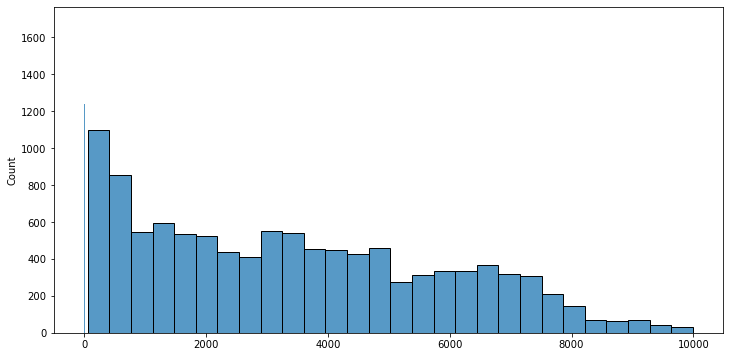

In [41]:
df = df.loc[df['sum_pay']<=10000] # убираем выбросы в колонке 'sum_pay'
statistical_analysis(list(df['sum_pay'])) 
statistical_analysis(list(df['months_reg'])) 
df.describe()

In [14]:
# 3. Создайте функцию для визуализации ***show_hist***, которая имеет следующие аргументы:
#     - ***r1*** (первый ряд для визуализации)
#     - ***r2*** (второй ряд для визуализации)
#     - ***graph_title*** (Строка-название графика)
#     - ***xlabel*** (подпись оси Х с дефолтным значением “*Размер платежа*”)
#     - ***ylabel*** (подпись оси Y с дефолтным значением “*Кол-во людей*”)
#     Функция должна с помощью библиотеки ***seaborn*** строить гистограмму для каждого из рядов (вместе на одном графике) 
#     и подписывать график (***graph_titile)*** и оси ***(xlabel, ylabel)***.

In [42]:
def show_hist(r1, r2, graph_title, xlabel='Размер платежа', ylabel='Кол-во людей'):
    sns.histplot(r1,
                 kde=True,
                 color='blue',
                 label='control') # функция построения распределения
    sns.histplot(r2,
                 kde=True,
                 color='orange',
                 label='test')
    plt.title(graph_title)
    plt.rcParams["figure.figsize"] = (20, 10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


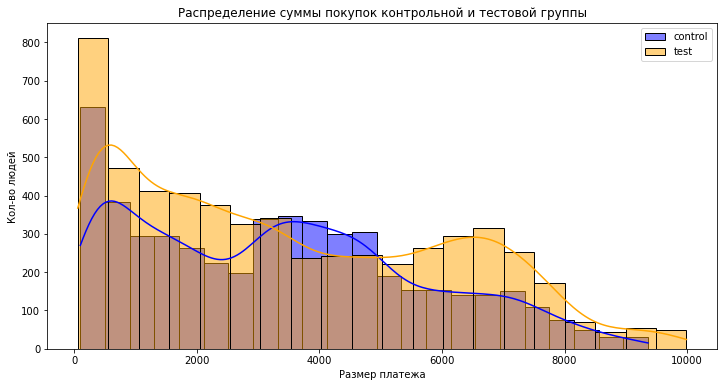

In [43]:
r1 = df[df['id_group'] == 'control']['sum_pay']
r2 = df[df['id_group'] == 'test']['sum_pay']

show_hist(r1, r2, 'Распределение суммы покупок контрольной и тестовой группы')

In [17]:
# Посмотрите на результаты параметрического и непараметрического теста (используйте созданные в первой 
#                                                                 шаге функции ***mann_whitney_func*** и ***test_calc***).

In [18]:
test_calc(r1, r2)

Среднее значение 1 ряда 3339.535408560311
Среднее значение 2 ряда 3497.8294684266857
Разница средних =  -158.29405986637448
Нулевая гипотеза о равенстве средних отвергается, т.к. p_value = 0.0007930687003032978, что меньше чем 0.05. Значение стат критерия -3.356159831664094


(-3.356159831664094, 0.0007930687003032978)

In [19]:
mann_whitney_func(r1, r2)

Распределения равны, т.к. p_value = 0.09764037292812035, что больше чем 0.05. Значение стат критерия 14141330.5


(14141330.5, 0.09764037292812035)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


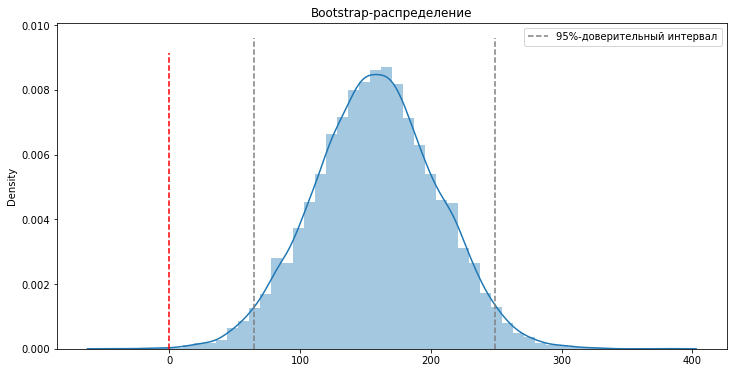

По результатам бутстрапа видно, что отметка 0 не входит в доверительный интервал, и т.к. распределение находится правее 0 - тестовая группа показала лучший результат, чем контрольная.


In [20]:
bootstrap_ab_func(r1, r2)

In [21]:
# **Анализ по торговым точкам**

# 1. Создайте цикл, пробегающий по всем уникальным торговым точкам.
# 2. Для каждой торговой точки проведите визуализацию с помощью гистограммы для сравнения результатов в А и В группе 
# (используйте функцию ***show_hist).***
# 3. Для каждой торговой точки посмотрите на результаты параметрического и непараметрического теста для сравнения 
# групп А и В (используйте функции ***mann_whitney_func*** и ***test_calc***).
# 4. Убедитесь, что в торговых точках, по которым вы делаете выводы, достаточное количество наблюдений.
# 5. Для каждой торговой точки с достаточным количеством наблюдений сделайте выводы.

In [22]:
def plot_segments_distribution(df, segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])['id_client'].count().reset_index()
        sns.catplot(x = segment, 
                    y = 'id_client', 
                    hue = test_factor, # сообщаем, что хотим, чтобы разные группы имели разный цвет
                    data = aggregated_data, 
                    kind = "bar", 
                    height = 4, # задаем размер графика 
                    aspect = 1.5) # задаем ширину столбца

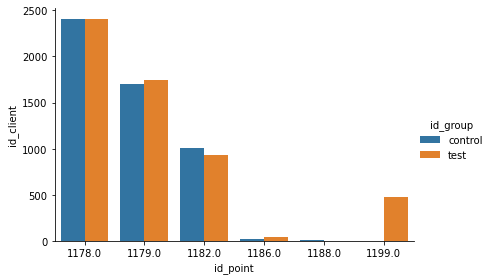

In [23]:
plot_segments_distribution(df, #датафрейм
                           ['id_point'], #сегменты
                           'id_group') #тест-фактор

In [24]:
# Целесообразно анализировать только торговые точки:
# 1178.0
# 1179.0
# 1182.0
# т.к.в остальных точках количество наблюдений не превышает 100

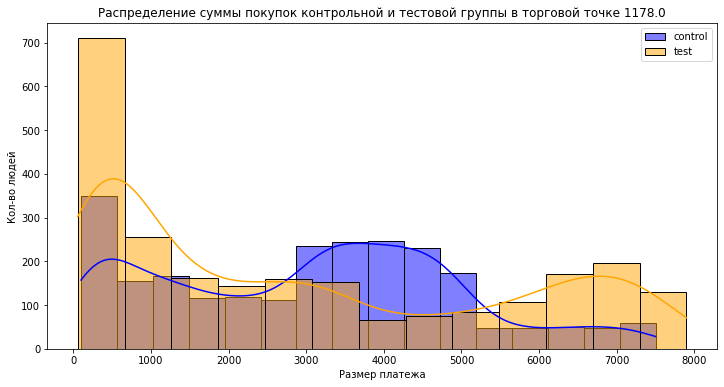

Среднее значение 1 ряда 3036.214731585518
Среднее значение 2 ряда 2936.386949293433
Разница средних =  99.82778229208498
Нулевая гипотеза о равенстве средних принимается, т.к. p_value = 0.1251217226713009, что больше чем 0.05. Значение стат критерия 1.5338932633911708
Распределения не равны, т.к. p_value = 1.5133330174771163e-06, что меньше чем 0.05. Значение стат критерия 3122337.5


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


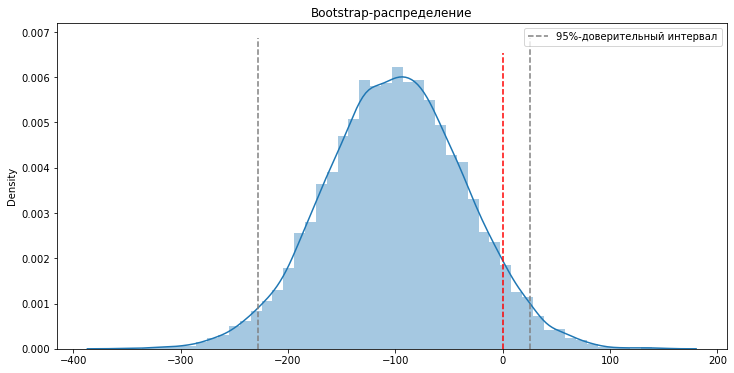

По результатам бутстрапа видно, что отметка 0 входит в доверительный интервал, - тестовая группа не отличается от контрольной.


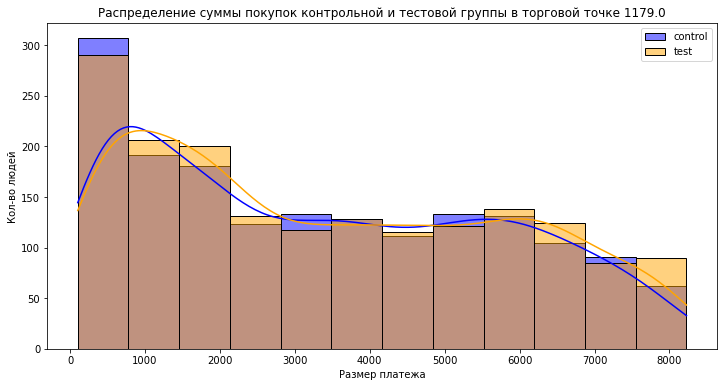

Среднее значение 1 ряда 3331.3105480259283
Среднее значение 2 ряда 3421.826934097421
Разница средних =  -90.51638607149289
Нулевая гипотеза о равенстве средних принимается, т.к. p_value = 0.2617037465196552, что больше чем 0.05. Значение стат критерия -1.1225576641441302
Распределения равны, т.к. p_value = 0.2580763851815786, что больше чем 0.05. Значение стат критерия 1447666.5


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


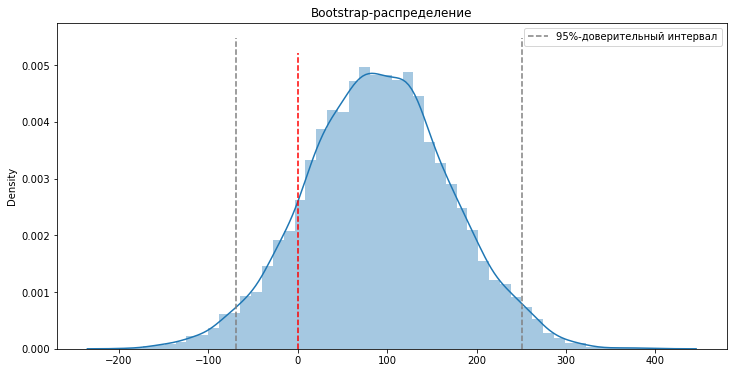

По результатам бутстрапа видно, что отметка 0 входит в доверительный интервал, - тестовая группа не отличается от контрольной.


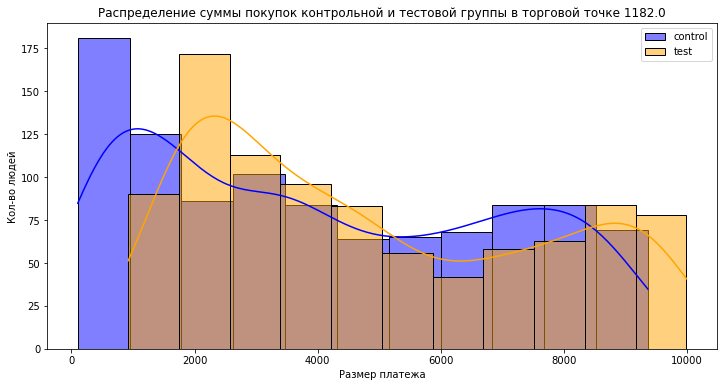

Среднее значение 1 ряда 4036.9426877470355
Среднее значение 2 ряда 4862.9508021390375
Разница средних =  -826.008114392002
Нулевая гипотеза о равенстве средних отвергается, т.к. p_value = 6.988545437582617e-11, что меньше чем 0.05. Значение стат критерия -6.557556680839402
Распределения не равны, т.к. p_value = 3.21069245696521e-13, что меньше чем 0.05. Значение стат критерия 382818.5


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


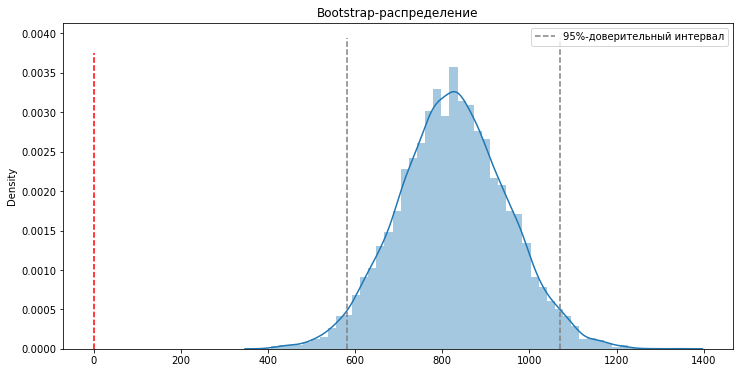

По результатам бутстрапа видно, что отметка 0 не входит в доверительный интервал, и т.к. распределение находится правее 0 - тестовая группа показала лучший результат, чем контрольная.


In [25]:
id_points = [1178.0, 1179.0, 1182.0]
for id_point in id_points:
    r1 = df[(df['id_group'] == 'control') & (df['id_point'] == id_point)]['sum_pay']
    r2 = df[(df['id_group'] == 'test') & (df['id_point'] == id_point)]['sum_pay']
    show_hist(r1, r2, f'Распределение суммы покупок контрольной и тестовой группы в торговой точке {id_point}')
    test_calc(r1, r2)
    mann_whitney_func(r1, r2)
    bootstrap_ab_func(r1, r2)

In [26]:
# ВЫВОДЫ по результатам АБ теста по торговым точкам:
# В торговых точках 1178.0 и 1179.0 нет статистически значимой разницы в сумме покупок.
# Альтернативная гипотеза о неравенстве средних сумм покупок принимается только по результатам анализа наблюдений
# в торговой точке 1182.0. Значение статистики отрицательное (-6.56) - значит второй аргумент (тест) лучше, 
# чем первый (контроль), что подтверждается и результатами бутстрапа.


In [27]:
# **Сегментация по длительности регистрации**

# 1. Рассмотрите два вида корреляции между выплаченной суммой и длительностью регистрации (корреляция Спирмена 
# и корреляция Пирсона).
# 2. Постройте *scatterplot* (из библиотеки *seaborn*) для визуализации связи между переменными
# 3. Как полученные результаты повлияют на ваши бизнес-рекомендации?

<AxesSubplot:title={'center':'Корреляция'}, xlabel='sum_pay', ylabel='months_reg'>

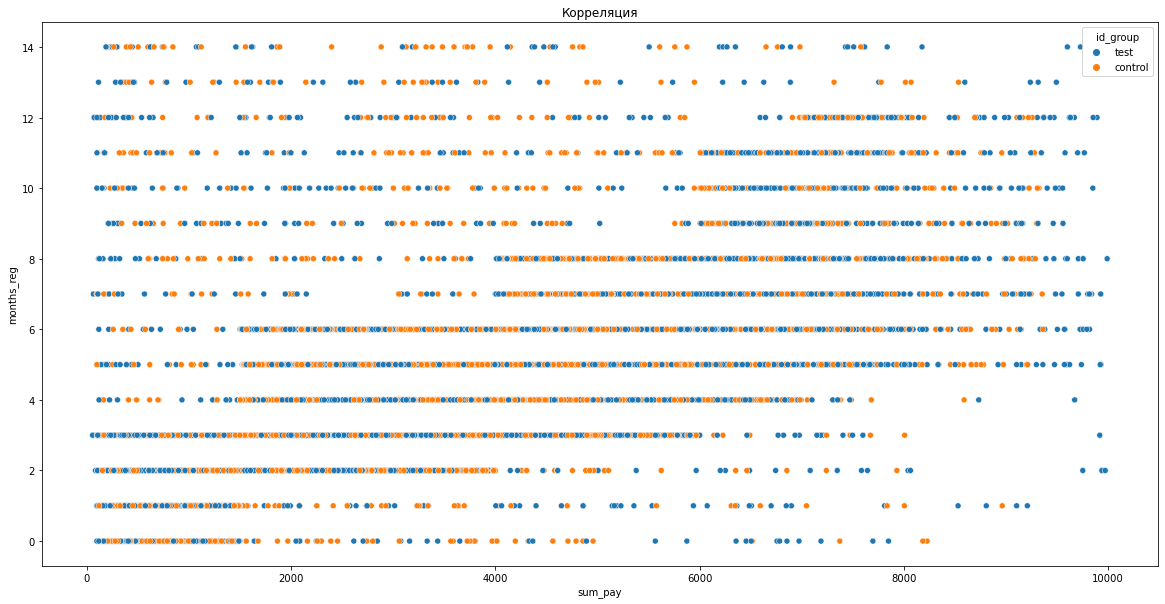

In [28]:
plt.figure(figsize=(20, 10))
plt.title('Корреляция')
sns.scatterplot(data=df, x="sum_pay", y="months_reg", hue="id_group")

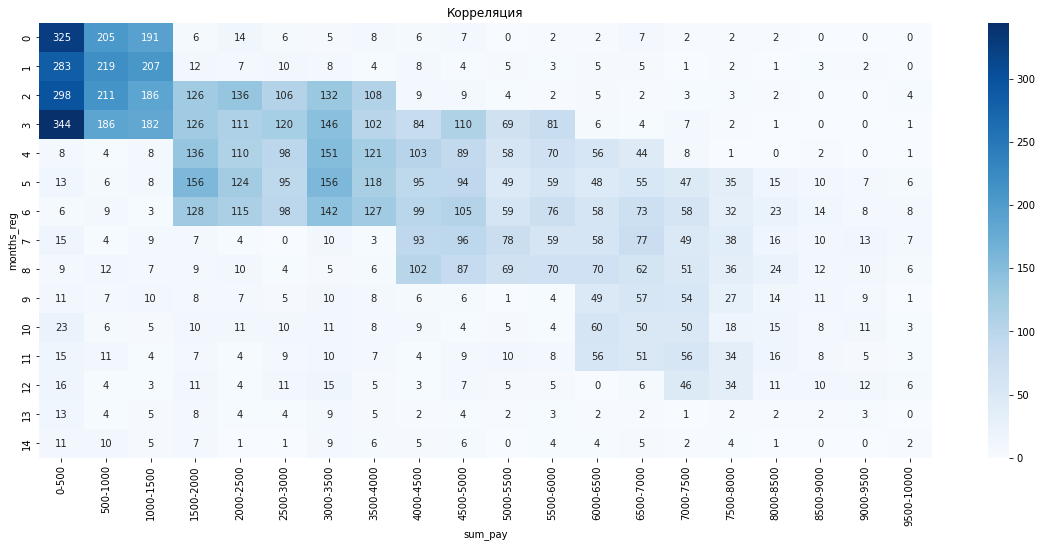

In [35]:
def rate(sum_pay):
    for i in range(500,10001,500):
        if sum_pay < i:
            return f'{i-500}-{i}'
                               
df['rate'] = df['sum_pay'].apply(rate)
df_heatmap = df.groupby(['rate', 'months_reg'])['id_client'].count().reset_index()
df_heatmap = df_heatmap.pivot(index="months_reg", 
                             columns="rate", 
                             values="id_client")
df_heatmap = df_heatmap.reindex(columns = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', 
                      '3500-4000', '4000-4500', '4500-5000','5000-5500', '5500-6000', '6000-6500', '6500-7000', 
                      '7000-7500', '7500-8000', '8000-8500', '8500-9000', '9000-9500', '9500-10000'])
df_heatmap.fillna(0, inplace=True)
plt.figure(figsize=(20,8))
sns.heatmap(df_heatmap, 
            annot=True, 
            cmap="Blues", 
            fmt='g')
plt.title("Корреляция")
plt.ylabel("months_reg")
plt.xlabel("sum_pay")
plt.show()

In [32]:
# 4. Создайте функцию ***proxi_ranges***, которая берет на вход
#     - Ряд 1 (***r1***)
#     - Ряд 2 (***r2***)
#     - Уровень значимости ***alpha*** (имеет дефолтное значение = 5%)
    
#     Данная функция выполняет следующие действия:
    
#     - Вычисляет дисперсии рядов ***r1*** и ***r2*** и их ковариацию (с помощью функции *cov* из библиотеки *numpy*)
#     - Принтит эти результаты с подписями (в user-friendly манере).
#     - Вычисляет корреляцию Пирсона (*pearsonr* из библиотеки *scipy.stats*) и корреляцию Спирмена (*spearmanr* из библиотеки *scipy.stats*) рядов ***r1*** и ***r2***, а также *****p_value* этих корреляций.
#     - Принтит результаты корреляционного анализа: корреляция равна нулю, если p_value больше ***alpha*** . В противном случае принтит, является ли корреляция слабой (меньше 0.3), средней (от 0.3 до 0.7) или сильной (больше 0.7) (как для корреляции Пирсона, так и для корреляции Спирмена отдельно).
#     - Функция не обладает return.

def proxi_ranges(r1, r2, alpha=0.05):
    var_r1 = r1.var()
    var_r2 = r2.var()
    print(f'Дисперсия первого ряда: {var_r1}')
    print(f'Дисперсия второго ряда: {var_r2}')
    cov = np.cov(r1, r2)
    print(f'Ковариация: {cov[0][1]}')
    cov_pearson = st.pearsonr(r1, r2)
    print(f'Корреляция Пирсона: {cov_pearson[0]}, p_value: {cov_pearson[1]}')
    if cov_pearson[1] > alpha:
        print('Корреляция равна нулю согласно корреляционного анализа Пирсона')
    else:
        if abs(cov_pearson[0]) < 0.3:
            print('Слабая корреляция согласно корреляционного анализа Пирсона')
        elif abs(cov_pearson[0]) < 0.7:
            print('Средняя корреляция согласно корреляционного анализа Пирсона')
        else:
            print('Сильная корреляция согласно корреляционного анализа Пирсона')
           
    cov_spearman = st.spearmanr(r1, r2)
    print(f'Корреляция Спирмена: {cov_spearman[0]}, p_value: {cov_spearman[1]}')
    if cov_spearman[1] > alpha:
        print('Корреляция равна нулю согласно корреляционного анализа Спирмена')
    else:
        if abs(cov_spearman[0]) < 0.3:
            print('Слабая корреляция согласно корреляционного анализа Спирмена')
        elif abs(cov_pearson[0]) < 0.7:
            print('Средняя корреляция согласно корреляционного анализа Спирмена')
        else:
            print('Сильная корреляция согласно корреляционного анализа Спирмена')


In [33]:
proxi_ranges(df['sum_pay'], df['months_reg'])


Дисперсия первого ряда: 5970737.65014
Дисперсия второго ряда: 10.031516422572558
Ковариация: 4645.67465580492
(0.6002767236031585, 0.0)
Корреляция Пирсона: 0.6002767236031585, p_value: 0.0
Средняя корреляция согласно корреляционного анализа Пирсона
Корреляция Спирмена: 0.6530682891933836, p_value: 0.0
Средняя корреляция согласно корреляционного анализа Спирмена


In [36]:
sum_pay = df[df['id_group'] == 'test']['sum_pay']
months_reg = df[df['id_group'] == 'test']['months_reg']
proxi_ranges(sum_pay, months_reg)

Дисперсия первого ряда: 6617248.620333984
Дисперсия второго ряда: 10.335671096630156
Ковариация: 5085.527370095059
(0.6149331838131691, 0.0)
Корреляция Пирсона: 0.6149331838131691, p_value: 0.0
Средняя корреляция согласно корреляционного анализа Пирсона
Корреляция Спирмена: 0.6641270363211891, p_value: 0.0
Средняя корреляция согласно корреляционного анализа Спирмена


In [37]:
sum_pay = df[df['id_group'] == 'control']['sum_pay']
months_reg = df[df['id_group'] == 'control']['months_reg']
proxi_ranges(sum_pay, months_reg)

Дисперсия первого ряда: 5253689.135348443
Дисперсия второго ряда: 9.699852694319596
Ковариация: 4161.8818812120335
(0.5830086454559582, 0.0)
Корреляция Пирсона: 0.5830086454559582, p_value: 0.0
Средняя корреляция согласно корреляционного анализа Пирсона
Корреляция Спирмена: 0.6385804587227423, p_value: 0.0
Средняя корреляция согласно корреляционного анализа Спирмена


In [ ]:
# Как полученные результаты повлияют на ваши бизнес-рекомендации?

In [ ]:
# ВЫВОДЫ: наблюдается средняя корреляция между длительностью регистрации клиента в программе лояльности и суммой,
# на которую была совершена покупка. Чем дольше клиент зарегистрирован в программе лояльности, тем выше сумма покупка.
# Данная корреляция наблюдается в течении первых 12 месяцев после даты регистрации, далее длительность уже не так 
# влияет на сумму покупки.
# Корреляция имеет линейный вид.

In [ ]:
# **Презентация и сторителлинг**

# 1. Оформите презентацию (5-8 слайдов), в которой вы излагаете рекомендации для вышестоящего руководства. 
# Постарайтесь избегать в презентации специфических терминов (таких как корреляция, тест Манна-Уитни т.д.)

# Презентация на странице https://coral-snout-5cb.notion.site/SkyCrossroads-fbfbd958c81540fb8abdac14e99f79a9